In [91]:
import seaborn as sns
sns.set(
    font='sans-serif', 
    style='white', 
    font_scale=1.4, 
    palette='muted',
    rc = {
    "lines.linewidth": 2, 
    "lines.markersize":6,
   }
)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Varying delta

In [92]:
dbscan = pd.read_csv("results/dbscan_bert_ap_cosine_deltas_extra")

In [93]:
dbscan

,EPSILONS,DELTAS,MAPS,RECALLS,TOTAL_CLUSTERS,CLUSTERS_RETRIEVED,NUM_DOCS_RETRIEVED
0,0.16,0.000000,0.020226,0.036933,23,1.00,132.14
1,0.16,0.022222,0.030207,0.049864,23,1.50,364.44
2,0.16,0.044444,0.040578,0.081689,23,2.18,620.22
3,0.16,0.066667,0.049631,0.100072,23,3.28,1096.46
4,0.16,0.088889,0.055985,0.112479,23,4.72,2029.98
5,0.16,0.111111,0.067802,0.141535,23,6.58,2851.62
6,0.16,0.133333,0.089722,0.168124,23,8.46,3543.40
7,0.16,0.155556,0.095942,0.183800,23,10.66,4050.68
8,0.16,0.177778,0.115596,0.210541,23,12.96,4653.66
9,0.16,0.200000,0.139182,0.249087,23,14.78,5018.90


In [94]:
kmeans = pd.read_csv("results/kmeans_bert_ap_cosine_deltas_extra")

In [95]:
kmeans

,CLUSTER_COUNTS,DELTAS,MAPS,RECALLS,CLUSTERS_RETRIEVED,NUM_DOCS_RETRIEVED
0,50,0.000000,0.134053,0.177451,1.00,118.80
1,50,0.022222,0.127289,0.182191,2.28,263.10
2,50,0.044444,0.139365,0.215153,4.18,499.50
3,50,0.066667,0.144874,0.236916,7.22,877.88
4,50,0.088889,0.144567,0.244449,12.32,1519.26
5,50,0.111111,0.144805,0.244827,17.06,2068.20
6,50,0.133333,0.145907,0.253378,23.00,2836.32
7,50,0.155556,0.148261,0.263072,28.02,3420.88
8,50,0.177778,0.147219,0.262745,32.82,4012.10
9,50,0.200000,0.147144,0.263285,37.60,4557.06


## MAP Scores

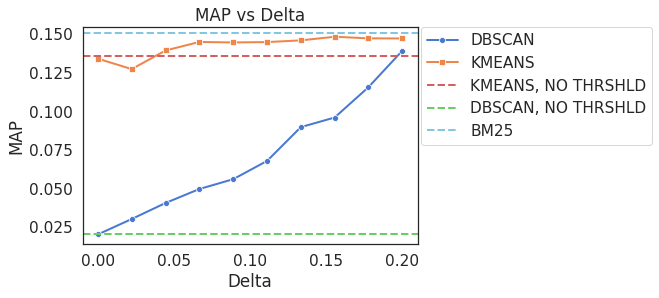

In [113]:
ax = sns.lineplot(data=dbscan, x='DELTAS', y='MAPS', marker='o', label="DBSCAN")
sns.lineplot(data=kmeans, x='DELTAS', y='MAPS', marker='s', label='KMEANS', ax=ax)
plt.axhline(y=0.13578, color='r', linestyle='--', label = 'KMEANS, NO THRSHLD')
plt.axhline(y=0.0202, color='g', linestyle='--', label = 'DBSCAN, NO THRSHLD')
plt.axhline(y=0.1505, color='c', linestyle='--', label = 'BM25')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
ax.set_xlabel('Delta')
ax.set_ylabel('MAP')
ax.set_title('MAP vs Delta')
plt.savefig('images/map.png', bbox_inches='tight')

## Recall@100

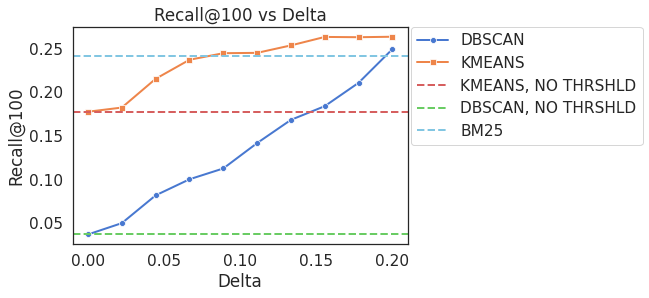

In [114]:
ax = sns.lineplot(data=dbscan, x='DELTAS', y='RECALLS', marker='o', label="DBSCAN")
sns.lineplot(data=kmeans, x='DELTAS', y='RECALLS', marker='s', label='KMEANS', ax=ax)
plt.axhline(y=0.1774, color='r', linestyle='--', label = 'KMEANS, NO THRSHLD')
plt.axhline(y=0.0369, color='g', linestyle='--', label = 'DBSCAN, NO THRSHLD')
plt.axhline(y=0.24076, color='c', linestyle='--', label = 'BM25')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
ax.set_xlabel('Delta')
ax.set_ylabel('Recall@100')
ax.set_title('Recall@100 vs Delta')
plt.savefig('images/recall.png', bbox_inches='tight')

## Average number of documents retrieved per query

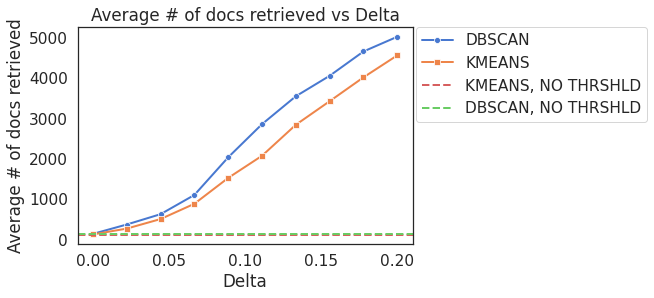

In [115]:
ax = sns.lineplot(data=dbscan, x='DELTAS', y='NUM_DOCS_RETRIEVED', marker='o', label="DBSCAN")
sns.lineplot(data=kmeans, x='DELTAS', y='NUM_DOCS_RETRIEVED', marker='s', label='KMEANS', ax=ax)
plt.axhline(y=108.7, color='r', linestyle='--', label = 'KMEANS, NO THRSHLD')
plt.axhline(y=132.14, color='g', linestyle='--', label = 'DBSCAN, NO THRSHLD')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
ax.set_xlabel('Delta')
ax.set_ylabel('Average # of docs retrieved')
ax.set_title('Average # of docs retrieved vs Delta')
plt.savefig('images/docs.png', bbox_inches='tight')

## Number of clusters retrieved

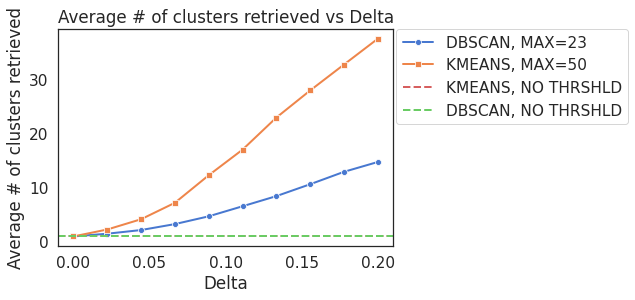

In [116]:
ax = sns.lineplot(data=dbscan, x='DELTAS', y='CLUSTERS_RETRIEVED', marker='o', label=f"DBSCAN, MAX={dbscan['TOTAL_CLUSTERS'][0]}")
sns.lineplot(data=kmeans, x='DELTAS', y='CLUSTERS_RETRIEVED', marker='s', label='KMEANS, MAX=50', ax=ax)
plt.axhline(y=1.0, color='r', linestyle='--', label = 'KMEANS, NO THRSHLD')
plt.axhline(y=1.0, color='g', linestyle='--', label = 'DBSCAN, NO THRSHLD')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
ax.set_xlabel('Delta')
ax.set_ylabel('Average # of clusters retrieved')
ax.set_title('Average # of clusters retrieved vs Delta')
plt.savefig('images/clusters.png', bbox_inches='tight')

In [1]:
from visualize import plot_MAP_AP

# Actual mAP scores

## BERT

### AP

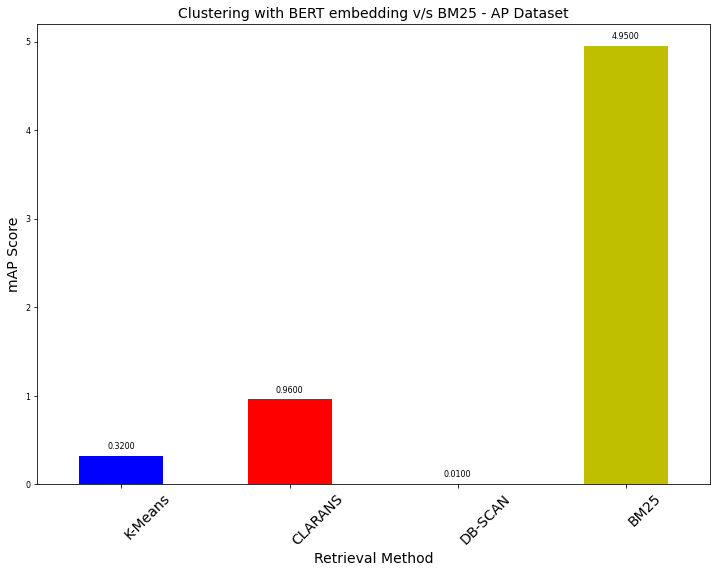

In [2]:
title = "Clustering with BERT embedding v/s BM25 - AP Dataset"
y = [0.32, 0.96, 0.01, 4.95]
plot_MAP_AP(y, title, plot_name="1")

### ZF

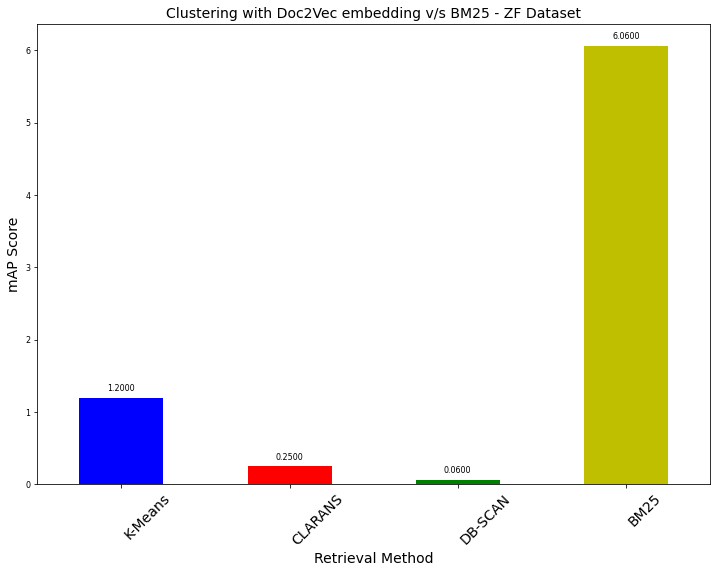

In [3]:
title = "Clustering with Doc2Vec embedding v/s BM25 - ZF Dataset"
y = [1.2, 0.25, 0.06, 6.06]
plot_MAP_AP(y, title, plot_name="2")

## Doc2Vec

### AP

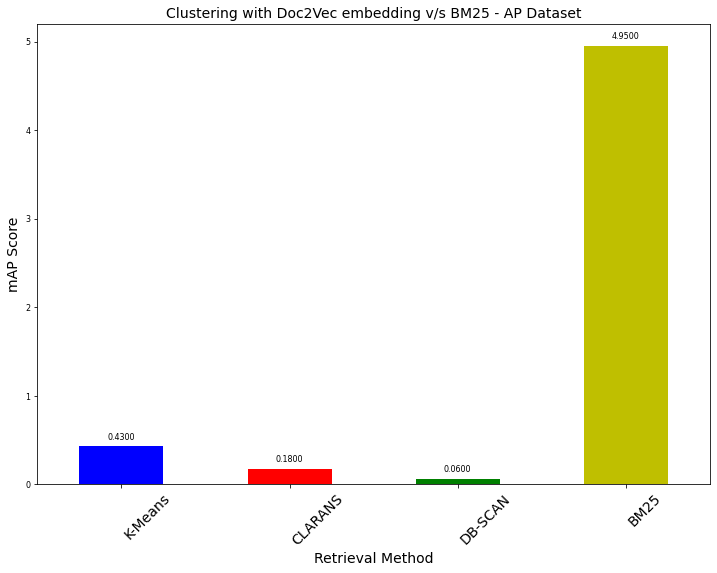

In [4]:
title = "Clustering with Doc2Vec embedding v/s BM25 - AP Dataset"
y = [0.43, 0.18, 0.06, 4.95]
plot_MAP_AP(y, title, plot_name="3")

### ZF

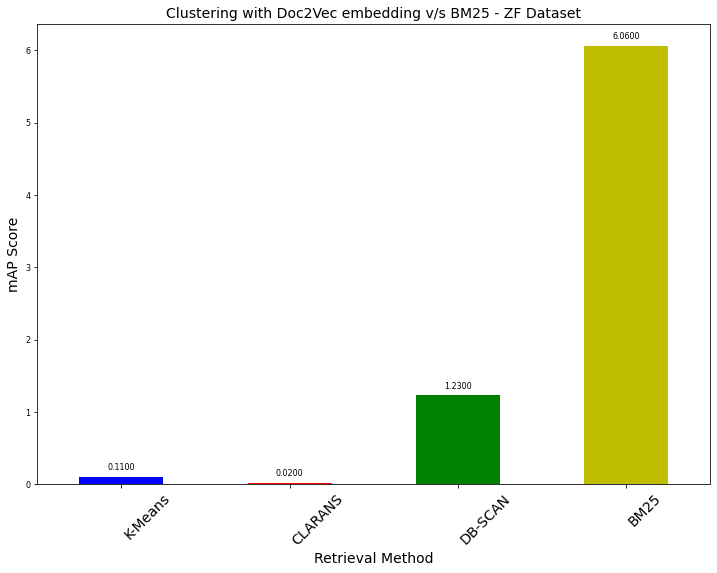

In [5]:
title = "Clustering with Doc2Vec embedding v/s BM25 - ZF Dataset"
y = [0.11, 0.02, 1.23, 6.06]
plot_MAP_AP(y, title, plot_name="4")